In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dill
import pandas as pd
import os, sys
sys.path.append('../')
import mg_si
%matplotlib inline
from matplotlib import gridspec


In [2]:
def change_in_core_wt(pl,t,solution):
    wt0 = np.sum(pl.reactions.core.M2wt(solution[0,2:6]))
    wte = np.sum(pl.reactions.core.M2wt(solution[-1,2:6]))
    return (wte-wt0)/wt0
    

In [3]:
good_dir = "/Users/nknezek/code/MgSi-Exsolution/valid_results_1/Tc5750_WtMg0.005_WtSi0.005_WtO0.015_fMb0.80_Xmb0.16_XSb0.01_nu2.00e+17_lthck1e+02_ovt4e+02"
pl, t, solution = dill.load(open(good_dir+'/data.m','rb'))
t_plt, all_params = pl.core_layer.compute_all_parameters(t,solution)

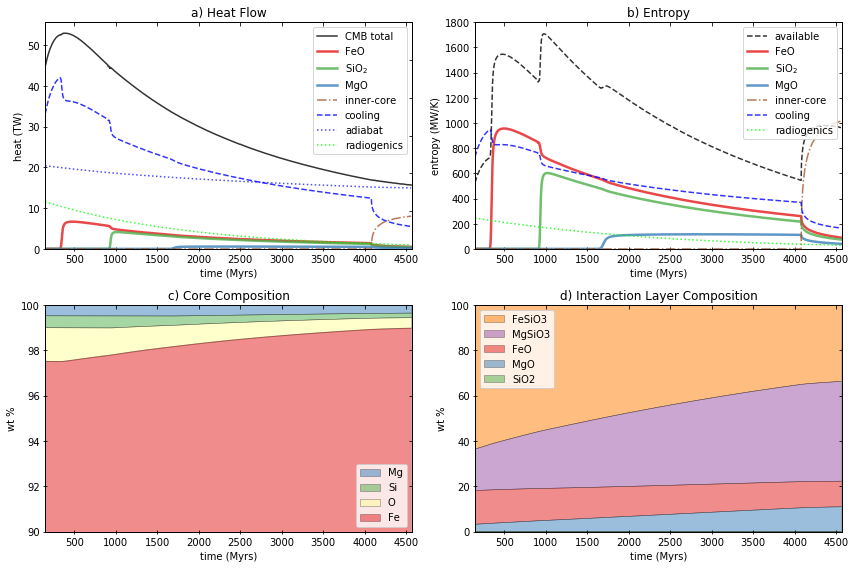

In [4]:
fstyle = '-'
mstyle = '-'
sstyle = '-'
ostyle = '-'

fcolor = '#e41a1c'
fscolor = '#ff7f00'
mcolor = '#377eb8'
mscolor = '#984ea3'
scolor = '#4daf4a'
ocolor = '#ffff99'
iccolor = '#a65628'

# fcolor = '#fbb4ae' # red-ish
# fscolor = '#fed9a6' # orange-ish
# mcolor = '#b3cde3' # blue-ish
# mscolor = '#decbe4' # purple-ish?
# scolor = '#ccebc5' # green-ish
# ocolor = '#ffffcc' # yellow?
# iccolor = '#e5d8bd' # 

exlw = 2.5
Cq = 1e12
Myrs = 365.25*3600*24*1e6
xmin = 150*365.25*3600*24*1e6/Myrs
xmax = 4568*365.25*3600*24*1e6/Myrs
alpha = 0.8
fillalpha = 0.5
plt.figure(figsize=(12,8))

gs = gridspec.GridSpec(2, 2, height_ratios=[1,1]) 
Qfe = all_params.Qgf + all_params.Qlf
Qmg = all_params.Qgm + all_params.Qlm
Qsi = all_params.Qgs + all_params.Qls
Qcmb = all_params.Qcmb
Qk = all_params.Qk
Qs = all_params.Qs
Qic = all_params.Qg + all_params.Ql
Qrc = all_params.Qrc

ax = plt.subplot(gs[0])
plt.plot(t_plt/Myrs, Qcmb/Cq, 'black', alpha=alpha, label=r'CMB total')
plt.plot(t_plt/Myrs, Qfe/Cq, fstyle,color=fcolor, alpha=alpha, label=r'FeO', lw=exlw)
plt.plot(t_plt/Myrs, Qsi/Cq, sstyle, color=scolor, alpha=alpha, label=r'SiO$_2$', lw=exlw)
plt.plot(t_plt/Myrs, Qmg/Cq, mstyle,color=mcolor, alpha=alpha, label=r'MgO', lw=exlw)
plt.plot(t_plt/Myrs, Qic/Cq, '-.', color=iccolor, alpha=alpha, label='inner-core')
plt.plot(t_plt/Myrs, Qs/Cq, '--', color='blue', alpha=alpha, label='cooling')
plt.plot(t_plt/Myrs, Qk/Cq, ':', color='blue', alpha=0.7, label='adiabat')
plt.plot(t_plt/Myrs, Qrc/Cq, ':', color='lime', alpha=alpha, label='radiogenics')

plt.legend()

plt.ylim(0,)
plt.xlim(xmin,xmax)
axt = ax.twiny()
axr = ax.twinx()
ax.tick_params()
ax.tick_params(bottom=True, left=True, direction='inout')
axt.tick_params(top=True, direction='in')
axr.tick_params(right=True, direction='in')
axt.set_xticklabels([])
axt.set_xticks(ax.get_xticks())
axt.set_xlim(ax.get_xlim())
axr.set_yticklabels([])
axr.set_ylim(ax.get_ylim())
axr.set_yticks(ax.get_yticks())
ax.set_ylabel('heat (TW)')
ax.set_xlabel('time (Myrs)')

plt.title('a) Heat Flow')
# plt.grid()

ax = plt.subplot(gs[1])
CE = 1e6
Efe = all_params.Egf 
Emg = all_params.Egm 
Esi = all_params.Egs
Ek = all_params.Ek
Eic = all_params.Eg + all_params.El
Es = all_params.Es
Erc = all_params.Er
Ephi = all_params.Ephi
# plt.subplot(gs[0])
plt.plot(t_plt/Myrs, Ephi/CE, '--',color='black', alpha=alpha, label=r'available')
plt.plot(t_plt/Myrs, Efe/CE, fstyle,color=fcolor, alpha=alpha, label=r'FeO', lw=exlw)
plt.plot(t_plt/Myrs, Esi/CE, sstyle, color=scolor, alpha=alpha, label=r'SiO$_2$', lw=exlw)
plt.plot(t_plt/Myrs, Emg/CE, mstyle,color=mcolor, alpha=alpha, label=r'MgO', lw=exlw)
plt.plot(t_plt/Myrs, Eic/CE, '-.', color=iccolor, alpha=alpha, label='inner-core')
plt.plot(t_plt/Myrs, Es/CE, '--', color='blue', alpha=alpha, label='cooling')
# plt.plot(t_plt/Myrs, Ek/CE, '-', color='blue', alpha=0.7, label='adiabat')
plt.plot(t_plt/Myrs, Erc/CE, ':', color='lime', alpha=alpha, label='radiogenics')
plt.legend(loc=0)
plt.ylim(0,)
plt.xlim(xmin,xmax)
axt = ax.twiny()
axr = ax.twinx()
ax.tick_params()
ax.tick_params(bottom=True, left=True, direction='inout')
axt.tick_params(top=True, direction='in')
axr.tick_params(right=True, direction='in')
axt.set_xticklabels([])
axt.set_xticks(ax.get_xticks())
axt.set_xlim(ax.get_xlim())
axr.set_yticklabels([])
axr.set_ylim(ax.get_ylim())
axr.set_yticks(ax.get_yticks())

ax.set_ylabel(r'entropy (MW/K)')
ax.set_xlabel('time (Myrs)')

plt.title('b) Entropy')
# plt.grid()


ax = plt.subplot(gs[2])
N_approx = 1000
di = int((len(t) - 1) // N_approx)

N = len(t_plt)
M_c, M_m = pl.reactions.unwrap_Moles(solution[::di, 2:][:N,:], return_sum=True, split_coremantle=True)
wt_mmass = np.expand_dims(np.array(pl.reactions.mantle.molmass),1)
wt = np.array(M_m)[:-1,:]*wt_mmass
wt_M_m =wt/np.sum(wt,0)
del wt_mmass,wt
wt_mmass = np.expand_dims(np.array(pl.reactions.core.molmass),1)
wt = np.array(M_c)[:-1,:]*wt_mmass
wt_M_c = wt/np.sum(wt,0)

names_c = pl.params.reactions.core.species
names_c.append('core')
colors_c = [mcolor, scolor, fcolor, ocolor]
names_m = pl.params.reactions.mantle.species
colorsc_m = [mcolor,scolor,fcolor,mscolor,fscolor]
names_m.append('mantle')

plt.title('c) Core Composition')
M0 = np.zeros(N)
for i in [0, 1, 3, 2]:
    if i != 0:
        M0 = M1
    M1 = M0 + wt_M_c[i]
    plt.fill_between(t_plt/Myrs, 100-M0*100., 100-M1*100., label=names_c[i], facecolor=colors_c[i], alpha=fillalpha, lw=0.5, edgecolor='k')
#     plt.plot(t_plt/Myrs, 100-M1*100., color='k',lw=0.5)
plt.legend(loc='lower right')
plt.ylim(90, 100)
plt.xlim(xmin,xmax)
axt = ax.twiny()
axr = ax.twinx()
ax.tick_params()
ax.tick_params(bottom=True, left=True, direction='inout')
axt.tick_params(top=True, direction='in')
axr.tick_params(right=True, direction='in')
axt.set_xticklabels([])
axt.set_xticks(ax.get_xticks())
axt.set_xlim(ax.get_xlim())
axr.set_yticklabels([])
axr.set_ylim(ax.get_ylim())
axr.set_yticks(ax.get_yticks())

ax.set_ylabel('wt %')
ax.set_xlabel('time (Myrs)')
# plt.grid()


ax = plt.subplot(gs[3])
plt.title('d) Interaction Layer Composition')
M0 = np.zeros(N)
# for i in [0, 1, 2, 3, 4]:
for i in [4,3,2,0,1]:
    if i != 4:
        M0 = M1
    M1 = M0 + wt_M_m[i]
    plt.fill_between(t_plt/Myrs, 100-M0*100., 100-M1*100., label=names_m[i], facecolor=colorsc_m[i], alpha=fillalpha, lw=0.5, edgecolor='k')
#     plt.plot(t_plt/Myrs, 100-M1*100., color='k',lw=0.5)

plt.legend(loc='upper left')
plt.ylim(0, 100)
plt.xlim(xmin,xmax)
axt = ax.twiny()
axr = ax.twinx()
ax.tick_params()
ax.tick_params(bottom=True, left=True, direction='inout')
axt.tick_params(top=True, direction='in')
axr.tick_params(right=True, direction='in')
axt.set_xticklabels([])
axt.set_xticks(ax.get_xticks())
axt.set_xlim(ax.get_xlim())
axr.set_yticklabels([])
axr.set_ylim(ax.get_ylim())
axr.set_yticks(ax.get_yticks())

ax.set_ylabel('wt %')
ax.set_xlabel('time (Myrs)')
# plt.grid()
plt.tight_layout()
plt.savefig('figure2-3.pdf')